# Pymaceuticals Inc.
---

### Analysis

As a senior data analyst at Pymaceuticals, Inc., I compared Pymaceuticals’ drug of interest, Capomulin's performance against the other treatments, as well as created tables and charts for a visual/technical report. I had to remove the results of a duplicate mouse that was causing the total number of mice to be 249, after the removal the actual amount of mice involved in the study's outcome is 248. The results are as followed:

- The bar graph shows that Capomulin & Ramicane were tested on more mice than the other treatment types. Though we look at multiple different areas for results this is worth noting. 
- Capomulin & Ramicane have the lowest mean, median, variance, standard deviation, and SEM of the tumor volume. This shows that they are potentially working against the tumors the most by shrinking them in size, and have dependable results.
- The line graph show that for a single mouse the Capomulin treatment resulted in the tumor increasing in size up until about the 20th day where it declines drastically. However around the 35th day the tumor actually began to grow in size again.
- The Correlation and Regression graph shows that the line regression has a positive relationship between the average tumor volume and the mices' weight.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
unique_mice_count = merged_data["Mouse ID"].nunique()
unique_mice_count

249

In [40]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = merged_data.loc[merged_data["Mouse ID"] == 'g989'] 
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#create a subset df of the one mouse ID with duplicates - g989
clean_data = merged_data.loc[merged_data["Mouse ID"]!="g989"]
#clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep = False)

clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [63]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_cleaned = clean_data["Mouse ID"].nunique()
print(f"Number of unique mice after cleaning: {unique_mice_count_cleaned}")

Number of unique mice after cleaning: 248


## Summary Statistics

In [202]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Group the data by 'Drug Regimen'
grouped_data = clean_data.groupby('Drug Regimen')

# Calculate mean for each regimen
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()

# Calculate median for each regimen
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()

# Calculate variance for each regimen
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()

# Calculate standard deviation for each regimen
std_deviation_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()

# Calculate standard error of the mean (SEM) for each regimen
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Create a summary statistics DataFrame
summary_statistics = pd.DataFrame({
    'Mean': mean_tumor_volume,
    'Median': median_tumor_volume,
    'Variance': variance_tumor_volume,
    'Standard Deviation': std_deviation_tumor_volume,
    'SEM': sem_tumor_volume
})

# Display the summary statistics DataFrame
summary_statistics



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [206]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg = clean_data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_agg.columns = summary_statistics_agg.columns.droplevel()
summary_statistics_agg.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "SEM"
}, inplace=True)
summary_statistics_agg = clean_data.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
summary_statistics_agg.columns = summary_statistics_agg.columns.droplevel()
summary_statistics_agg.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "SEM"
}, inplace=True)

summary_statistics_agg

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

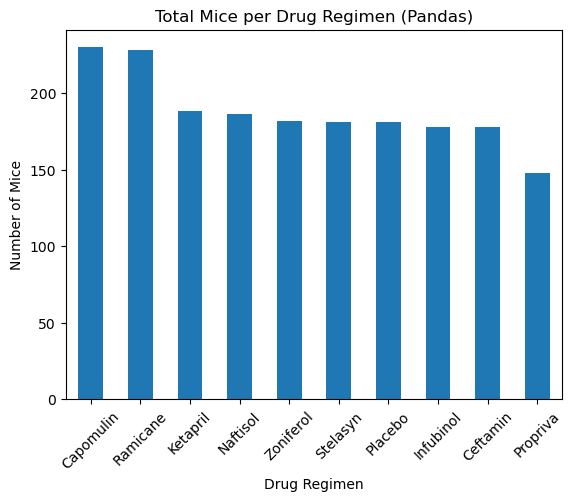

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_pandas = clean_data["Drug Regimen"].value_counts().plot(
    kind="bar", title="Total Mice per Drug Regimen (Pandas)", 
    xlabel="Drug Regimen", ylabel="Number of Mice", rot=45)
plt.show()

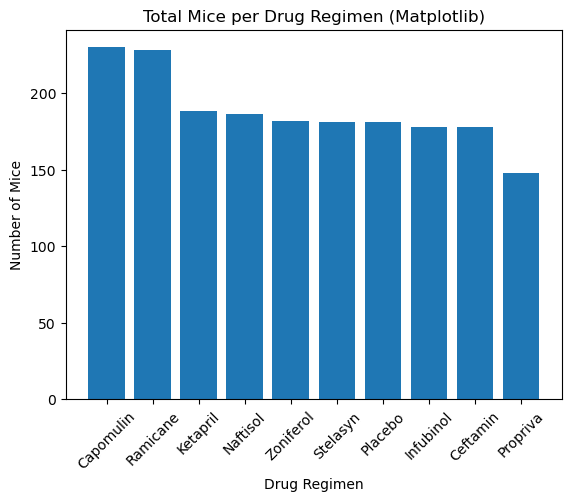

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_chart_matplotlib = plt.bar(clean_data["Drug Regimen"].value_counts().index, clean_data["Drug Regimen"].value_counts())
plt.title("Total Mice per Drug Regimen (Matplotlib)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=45)
plt.show()

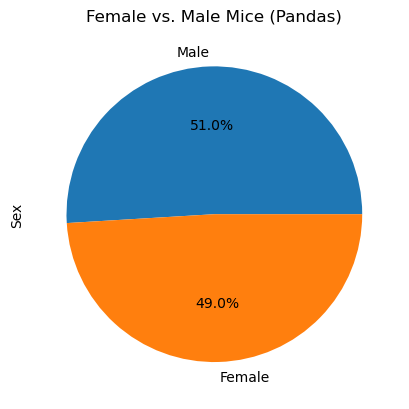

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution_pandas = clean_data["Sex"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', title="Female vs. Male Mice (Pandas)",
    ylabel='Sex', fontsize = 10)
plt.show()

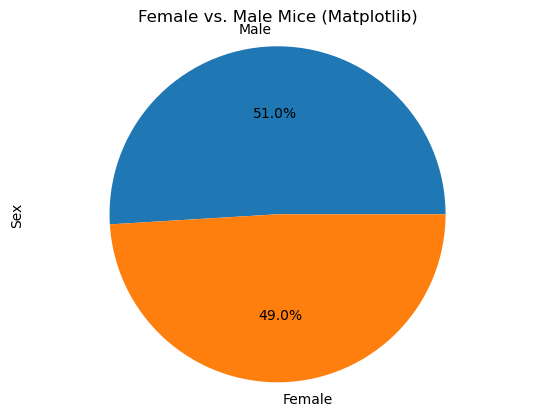

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution_matplotlib = plt.pie(clean_data["Sex"].value_counts(), labels=clean_data["Sex"].value_counts().index, autopct='%1.1f%%')
plt.title("Female vs. Male Mice (Matplotlib)")
plt.axis("equal") 
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [143]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df = timepoint_df.merge(clean_data, on=["Mouse ID", "Timepoint"], how="left")

In [144]:
# Put treatments into a list for for loop (and later for plot labels)
#Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
tumor_vol_data = {}
    
for treatment in treatments:
    tumor_vol = tumor_vol_df[tumor_vol_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data[treatment] = tumor_vol



 
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile


    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_vol[(tumor_vol < lower_bound) & (tumor_vol > upper_bound)]

    print(f"{treatment}'s potential outliers:")
    print(outliers)

Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


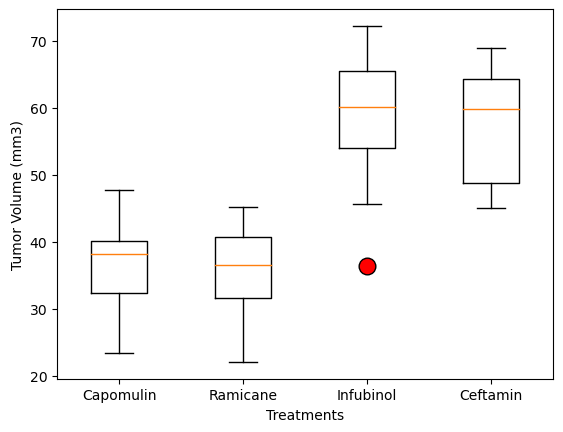

In [152]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([tumor_vol_data[treatment] for treatment in treatments], labels = treatments,
            flierprops=dict(marker='o', markerfacecolor='r', markersize=12))
plt.xlabel('Treatments')
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

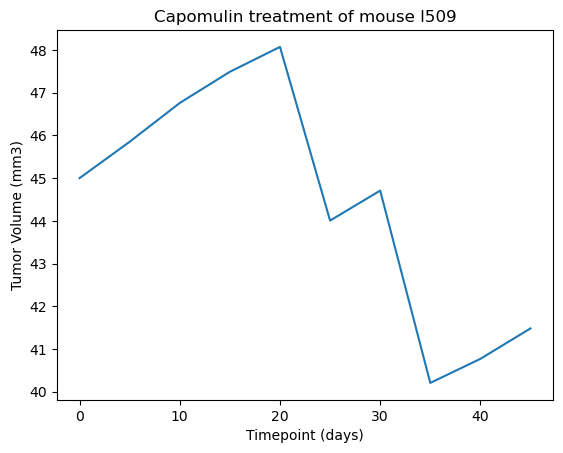

In [171]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
single_mouse = capomulin_data[capomulin_data["Mouse ID"] == "l509"]
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"],
         linestyle='-', label="Tumor Volume")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


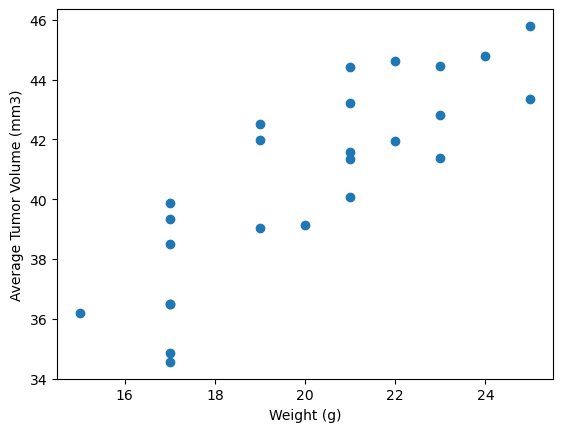

In [170]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


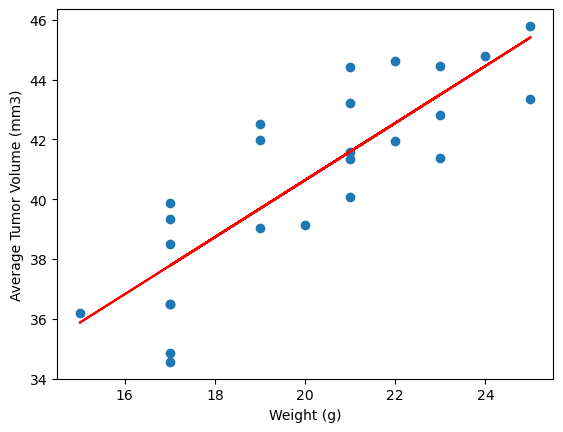

In [197]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_vol)
regression_line = slope * mouse_weight + intercept

plt.scatter(mouse_weight, avg_tumor_vol, marker='o', label='Data Points')

plt.plot(mouse_weight, regression_line, color='red', label=f'Regression Line (R-squared = {rvalue**2:.2f})')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()